In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 9.6 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

dataset = load_dataset("mnist")

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
import numpy as np

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [6]:
dataset['train'].features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], id=None)}

In [7]:
np.array(dataset['train'][0]['image']).shape

(28, 28)

In [11]:
tf_train_dataset = dataset['train'].to_tf_dataset(shuffle=True,columns = ['image','label'],batch_size=16)
tf_test_dataset = dataset['test'].to_tf_dataset(shuffle=True,columns =['image','label'],batch_size=16)
X_test = np.array([np.array(img) for img in dataset['test'][:]['image']])
y_test = encoder.fit_transform(np.array(dataset['test'][:]['label']).reshape(-1,1))
X = np.array([np.array(img) for img in dataset['train'][:]['image']])
y = encoder.fit_transform(np.array(dataset['train'][:]['label']).reshape(-1,1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
model = Sequential()

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x=X,y=y,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0092 - accuracy: 0.7696 - val_loss: 0.3925 - val_accuracy: 0.8895
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4446 - accuracy: 0.8792 - val_loss: 0.2585 - val_accuracy: 0.9333
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3116 - accuracy: 0.9133 - val_loss: 0.1849 - val_accuracy: 0.9474
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2604 - accuracy: 0.9281 - val_loss: 0.2148 - val_accuracy: 0.9460
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2232 - accuracy: 0.9374 - val_loss: 0.1777 - val_accuracy: 0.9531


In [28]:
X.shape,y.shape

((60000, 28, 28), (60000, 10))

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
encoder = OneHotEncoder(sparse=False)


In [10]:
y = encoder.fit_transform(y)

NameError: ignored

In [16]:
def predict(img):
    img = np.array(img).reshape(1, 28, 28)
    out = model.predict(img)
    top5 = np.argsort(out[0])[::-1][:5]
    labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

    # Create a dictionary with label-probability pairs for the top 5 predictions
    probabilities = {labels[i]: out[0][i] for i in top5}

    return probabilities


In [17]:
predict(X_test[0])

1/1 [==============================] - 0s 78ms/step


{'seven': 0.9999982,
 'two': 1.7103471e-06,
 'one': 8.695266e-08,
 'four': 4.503543e-10,
 'nine': 2.1285165e-10}

In [64]:
out = model.predict([X_test[0:1]])

1/1 [==============================] - 0s 19ms/step


In [67]:
np.argsort(out[0])[::-1][:5]

array([7, 9, 5, 3, 0])

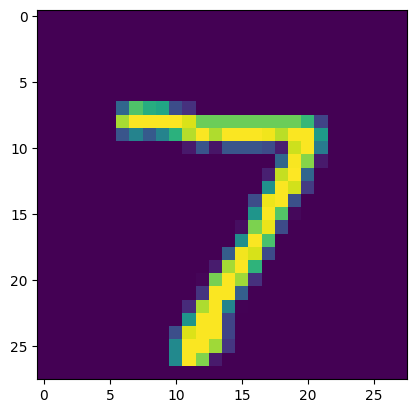

In [53]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [1]:
import gradio as gr

In [33]:
gr.Interface(fn=predict,
             inputs="sketchpad",
             outputs="label",
             live=True).launch()

ValueError: ignored